In [93]:
import preprocessor as p
import numpy as np 
import pandas as pd 
import emoji
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import kaggledatasets as kd
import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tqdm import tqdm
import neattext as nfx

In [95]:
#data=pd.read_csv('dataset/dailydialog.csv')
data=pd.read_csv('dataset/text_emotion.csv')
#data=pd.read_csv('dataset/isear.csv')
#data=pd.read_csv('dataset/merged.csv')

#data=pd.read_csv('dataset/emotion-stimulus.csv')
#data=pd.read_csv('dataset/merged.csv')

In [96]:
data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [98]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [99]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [100]:

data['Clean_Text']=data['content'].apply(nfx.remove_special_characters)

In [101]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_punctuations)

In [102]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_stopwords)

In [103]:
data['Clean_Text']=data['Clean_Text'].apply(nfx.remove_userhandles)

In [104]:
data[['content','Clean_Text']]

,content,Clean_Text
0,@tiffanylue i know i was listenin to bad habi...,tiffanylue know listenin bad habit earlier sta...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,dannycastillo want trade Houston tickets
...,...,...
39995,@JohnLloydTaylor,JohnLloydTaylor
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies woman man long youre...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley WASSUP BEAUTIFUL FOLLOW PEEP NEW HIT ...


In [115]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [116]:
sent_to_id  = {"joy":0, "fear":1, "anger":2, "sadness":3, "disgust":4, "shame":5, "guilt":6}

In [117]:
data["sentiment_id"] = data['Emotion'].map(sent_to_id)

In [118]:
data

In [119]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data.sentiment)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [120]:
Xfeatures=data['Clean_Text']

In [121]:
final = data[['Clean_Text', 'sentiment']]
print("Train DataFrame")
display(final.head(3))

Train DataFrame


,Clean_Text,sentiment
0,tiffanylue know listenin bad habit earlier sta...,empty
1,Layin n bed headache ughhhhwaitin,sadness
2,Funeral ceremonygloomy friday,sadness


In [122]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures,Y, random_state=42, test_size=0.2, shuffle=True)

In [123]:
data

,tweet_id,sentiment,author,content,Clean_Text
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants hang friends SOON
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,dannycastillo want trade Houston tickets
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies woman man long youre...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley WASSUP BEAUTIFUL FOLLOW PEEP NEW HIT ...


In [153]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 60
Epoch = 5
token.fit_on_texts(list(X_train) + list(X_test))
X_train_pad = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=max_len)

In [154]:
w_idx = token.word_index

In [155]:
#embed_dim = 160
#lstm_out = 250

#model = Sequential()
#model.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1]))
#model.add(SpatialDropout1D(0.2))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
#model.add(keras.layers.core.Dense(7, activation='softmax'))
#adam rmsprop 
#model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
#print(model.summary())

In [156]:
#batch_size = 32

In [157]:
#model.fit(X_train_pad, y_train, epochs = Epoch, batch_size=batch_size,validation_data=(X_test_pad, y_test))

In [158]:
def plot_result(df):
    #colors=['#D50000','#000000','#008EF8','#F5B27B','#EDECEC','#D84A09','#019BBD','#FFD000','#7800A0','#098F45','#807C7C','#85DDE9','#F55E10']
    #fig = go.Figure(data=[go.Pie(labels=df.sentiment,values=df.percentage, hole=.3,textinfo='percent',hoverinfo='percent+label',marker=dict(colors=colors, line=dict(color='#000000', width=2)))])
    #fig.show()
    colors={'love':'rgb(213,0,0)','empty':'rgb(0,0,0)',
                    'sadness':'rgb(0,142,248)','enthusiasm':'rgb(245,178,123)',
                    'neutral':'rgb(237,236,236)','worry':'rgb(216,74,9)',
                    'surprise':'rgb(1,155,189)','fun':'rgb(255,208,0)',
                    'hate':'rgb(120,0,160)','happiness':'rgb(9,143,69)',
                    'boredom':'rgb(128,124,124)','relief':'rgb(133,221,233)',
                    'anger':'rgb(245,94,16)'}
    col_2={}
    for i in result.sentiment.to_list():
        col_2[i]=colors[i]
    fig = px.pie(df, values='percentage', names='sentiment',color='sentiment',color_discrete_map=col_2,hole=0.3)
    fig.show()

In [159]:
result =get_sentiment(model,"Had an absolutely brilliant day ðŸ˜ loved seeing an old friend and reminiscing")
plot_result(result)
result =get_sentiment(model,"The pain my heart feels is just too much for it to bear. Nothing eases this pain. I can’t hold myself back. I really miss you")
plot_result(result)
result =get_sentiment(model,"I hate this game so much,It make me angry all the time ")
plot_result(result)

NameError: name 'model' is not defined

In [162]:
def read_data(file_name):
    with open(file_name,'r',encoding="utf8") as f:
        word_vocab = set() 
        word2vector = {}
        for line in f:
            line_ = line.strip() 
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [163]:
vocab, word_to_idx =read_data("glove.6B.50d.txt")

Total Words in DataSet: 400000


In [164]:
embedding_matrix = np.zeros((len(w_idx) + 1, 50))
for word, i in w_idx.items():
    embedding_vector = word_to_idx.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [168]:
embed_dim = 50
lstm_out = 64

model_lstm_gwe = Sequential()
model_lstm_gwe.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1],weights=[embedding_matrix],trainable=True))
model_lstm_gwe.add(SpatialDropout1D(0.2))
model_lstm_gwe.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model_lstm_gwe.add(keras.layers.core.Dense(13, activation='softmax'))
#adam rmsprop 
model_lstm_gwe.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model_lstm_gwe.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 60, 50)            2665200   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 60, 50)           0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 64)                29440     
                                                                 
 dense_7 (Dense)             (None, 13)                845       
                                                                 
Total params: 2,695,485
Trainable params: 2,695,485
Non-trainable params: 0
_________________________________________________________________
None


In [169]:
batch_size = 128

In [170]:
hist = model_lstm_gwe.fit(X_train_pad, y_train, epochs = Epoch, batch_size=batch_size,validation_data=(X_test_pad, y_test))

Epoch 1/5
250/250 [==============================] - 32s 119ms/step - loss: 2.0976 - accuracy: 0.2733 - val_loss: 1.9908 - val_accuracy: 0.3190
Epoch 2/5
250/250 [==============================] - 30s 119ms/step - loss: 1.9669 - accuracy: 0.3263 - val_loss: 1.9471 - val_accuracy: 0.3274
Epoch 3/5
250/250 [==============================] - 30s 118ms/step - loss: 1.8930 - accuracy: 0.3531 - val_loss: 1.9110 - val_accuracy: 0.3446
Epoch 4/5
250/250 [==============================] - 30s 118ms/step - loss: 1.8270 - accuracy: 0.3765 - val_loss: 1.9162 - val_accuracy: 0.3470
Epoch 5/5
250/250 [==============================] - 30s 119ms/step - loss: 1.7511 - accuracy: 0.4046 - val_loss: 1.9144 - val_accuracy: 0.3480


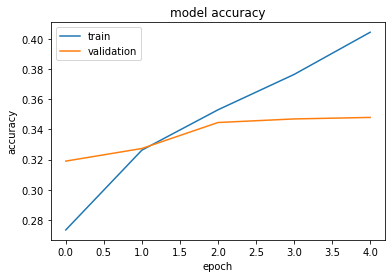

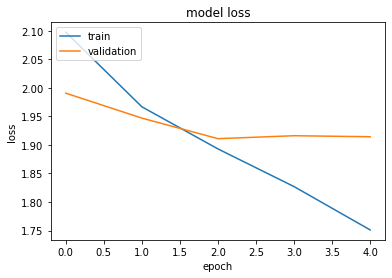

In [171]:
import matplotlib.pyplot as plt
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



y_test_arg=np.argmax(y_test,axis=1)

predicted = model_lstm_gwe.predict(X_test_pad)
predict_classes=np.argmax(predicted,axis=1)
predict_classes[1]                        
print('Confusion Matrix')
print(metrics.classification_report(y_test_arg, predict_classes))

Confusion Matrix
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.15      0.01      0.03       338
           5       0.32      0.41      0.36      1028
           6       0.42      0.13      0.20       268
           7       0.46      0.43      0.44       762
           8       0.38      0.51      0.43      1740
           9       0.00      0.00      0.00       352
          10       0.33      0.18      0.23      1046
          11       0.33      0.00      0.00       425
          12       0.32      0.55      0.40      1666

    accuracy                           0.35      8000
   macro avg       0.21      0.17      0.16      8000
weighted avg       0.31      0.35      0.30      8000



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

test_sequences = token.texts_to_sequences(X_test_pad)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [57]:
accr = model_lstm_gwe.evaluate(test_sequences_matrix,y_test)

16/16 [==============================] - 0s 14ms/step - loss: 0.3986 - accuracy: 0.8778


In [58]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model_lstm_gwe.predict(X_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

UnimplementedError: Graph execution error:

Detected at node 'sequential/Cast' defined at (most recent call last):
    File "D:\Anaconda\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "D:\Anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "D:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "D:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "D:\Anaconda\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "D:\Anaconda\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "D:\Anaconda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "D:\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "D:\Anaconda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\yasin\AppData\Local\Temp/ipykernel_7092/916074065.py", line 1, in <module>
      y_pred_for_model=model_lstm_gwe.predict(X_test)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 571, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 671, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential/Cast'
Cast string to float is not supported
	 [[{{node sequential/Cast}}]] [Op:__inference_predict_function_21693]

In [51]:
y_pred_for_model=model_lstm_gwe.predict(X_test)

print(classification_report(y_test, y_pred_for_model))

UnimplementedError: Graph execution error:

Detected at node 'sequential/Cast' defined at (most recent call last):
    File "D:\Anaconda\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "D:\Anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "D:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "D:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "D:\Anaconda\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "D:\Anaconda\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "D:\Anaconda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "D:\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "D:\Anaconda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\yasin\AppData\Local\Temp/ipykernel_7092/916074065.py", line 1, in <module>
      y_pred_for_model=model_lstm_gwe.predict(X_test)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 571, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 671, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential/Cast'
Cast string to float is not supported
	 [[{{node sequential/Cast}}]] [Op:__inference_predict_function_21693]

In [154]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)

X_data = tokenizer.texts_to_sequences(X_data)


index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))


Number of unique words: 12625


In [155]:
X_data = pad_sequences(X_data, maxlen = max_seq_len )

In [156]:
X_data

array([[    0,     0,     0, ...,   263,    43,    30],
       [    0,     0,     0, ...,   817,   438,  5686],
       [    0,     0,     0, ...,   323,   166,   374],
       ...,
       [    0,     0,     0, ...,    99,   652,   680],
       [    0,     0,     0, ...,   755,  2239,    28],
       [    0,     0,     0, ...,   202,   179, 12625]])

In [181]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

In [184]:
def create_embedding_matrix(filepath,word_index,embedding_dim):
    vocab_size=len(word_index)+1
    embedding_matrix=np.zeros((vocab_size,embedding_dim))
    with open(filepath) as f:
        for line in f:
            word,*vector=line.split()
            if word in word_index:
                idx=word_index[word]
                embedding_matrix[idx] = np.array(vector,dtype=np.float32)[:embedding_dim]
    return embedding_matrix


In [185]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 8044: character maps to <undefined>

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         120800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 200)         240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 96, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

Epoch 1/12
38/38 [==============================] - 41s 873ms/step - loss: -436.3847 - accuracy: 0.1453 - val_loss: -1634.8485 - val_accuracy: 0.1480 - lr: 0.0010
Epoch 2/12
38/38 [==============================] - 32s 843ms/step - loss: -5271.8003 - accuracy: 0.1439 - val_loss: -11400.9639 - val_accuracy: 0.1480 - lr: 0.0010
Epoch 3/12
38/38 [==============================] - 35s 932ms/step - loss: -23777.4355 - accuracy: 0.1439 - val_loss: -40369.0352 - val_accuracy: 0.1480 - lr: 0.0010
Epoch 4/12
38/38 [==============================] - 34s 883ms/step - loss: -68601.6250 - accuracy: 0.1439 - val_loss: -101560.3828 - val_accuracy: 0.1480 - lr: 0.0010
Epoch 5/12
38/38 [==============================] - 34s 900ms/step - loss: -153054.8281 - accuracy: 0.1439 - val_loss: -209075.5781 - val_accuracy: 0.1480 - lr: 0.0010
Epoch 6/12
38/38 [==============================] - 34s 898ms/step - loss: -291108.0312 - accuracy: 0.1439 - val_loss: -376618.2812 - val_accuracy: 0.1480 - lr: 0.0010


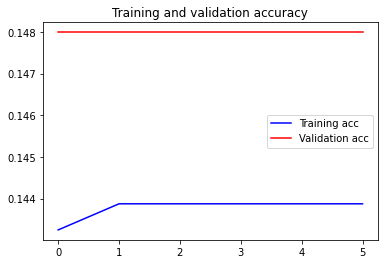

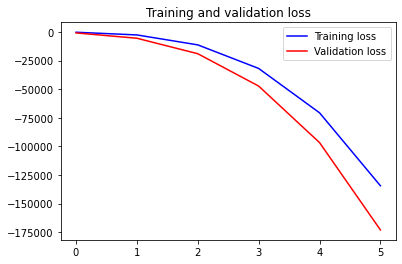

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.15      1.00      0.26        55
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        52

    accuracy                           0.15       374
   macro avg       0.02      0.14      0.04       374
weighted avg       0.02      0.15      0.04       374



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
